In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
from time import strptime

In [3]:
# loading dataset
comcast = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comcast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
# date column is still a string, we need to parse it to a datetime format
comcast['datetime'] = pd.to_datetime(comcast['Date_month_year'])

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: datetime, dtype: int64


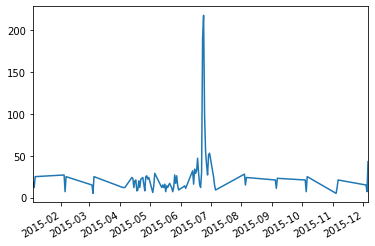

In [8]:
# Daily trend
print(comcast['datetime'].value_counts().head(5))
comcast['datetime'].value_counts().plot()

In [9]:
comcast['year'] = pd.DatetimeIndex(comcast['datetime']).year
comcast['month'] = pd.DatetimeIndex(comcast['datetime']).month
comcast['month'] = comcast['month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
comcast['month_year'] = comcast['month'] + comcast['year'].astype(str)

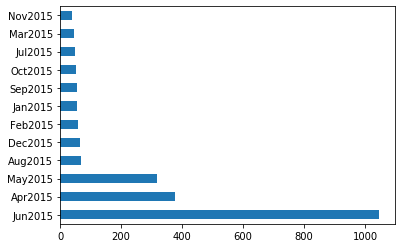

In [11]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
#Monthly trend
comcast['month_year'].value_counts().plot(kind="barh")

In [41]:
# Create a new categorical variable with value as Open and Closed.
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
event_dictionary ={'Open' : 'Open', 'Pending' : 'Open', 'Closed' : 'Closed', 'Solved' : 'Closed'} 
  
# Add a new column named 'OpenClosed' 
comcast['OpenClosed'] = comcast['Status'].apply(set_value, args =(event_dictionary, )) 
  
# Print the DataFrame 
#print(comcast) 

In [42]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime,year,month,month_year,OpenClosed
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,2015,Apr,Apr2015,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,2015,Aug,Aug2015,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,2015,Apr,Apr2015,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,2015,Jul,Jul2015,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,2015,May,May2015,Closed


In [40]:
#Which state has the maximum complaints
Complaint_state_count = pd.core.frame.DataFrame({"count": comcast.groupby(['State']).size().sort_values(ascending=False)}).reset_index()
Complaint_state_count.head(10)

#Georgia has the highest number of complaints

,State,count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [60]:
#Provide a table with the frequency of complaint types.
complaint = comcast.groupby(['State', 'OpenClosed']).size().unstack()
complaint

OpenClosed,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


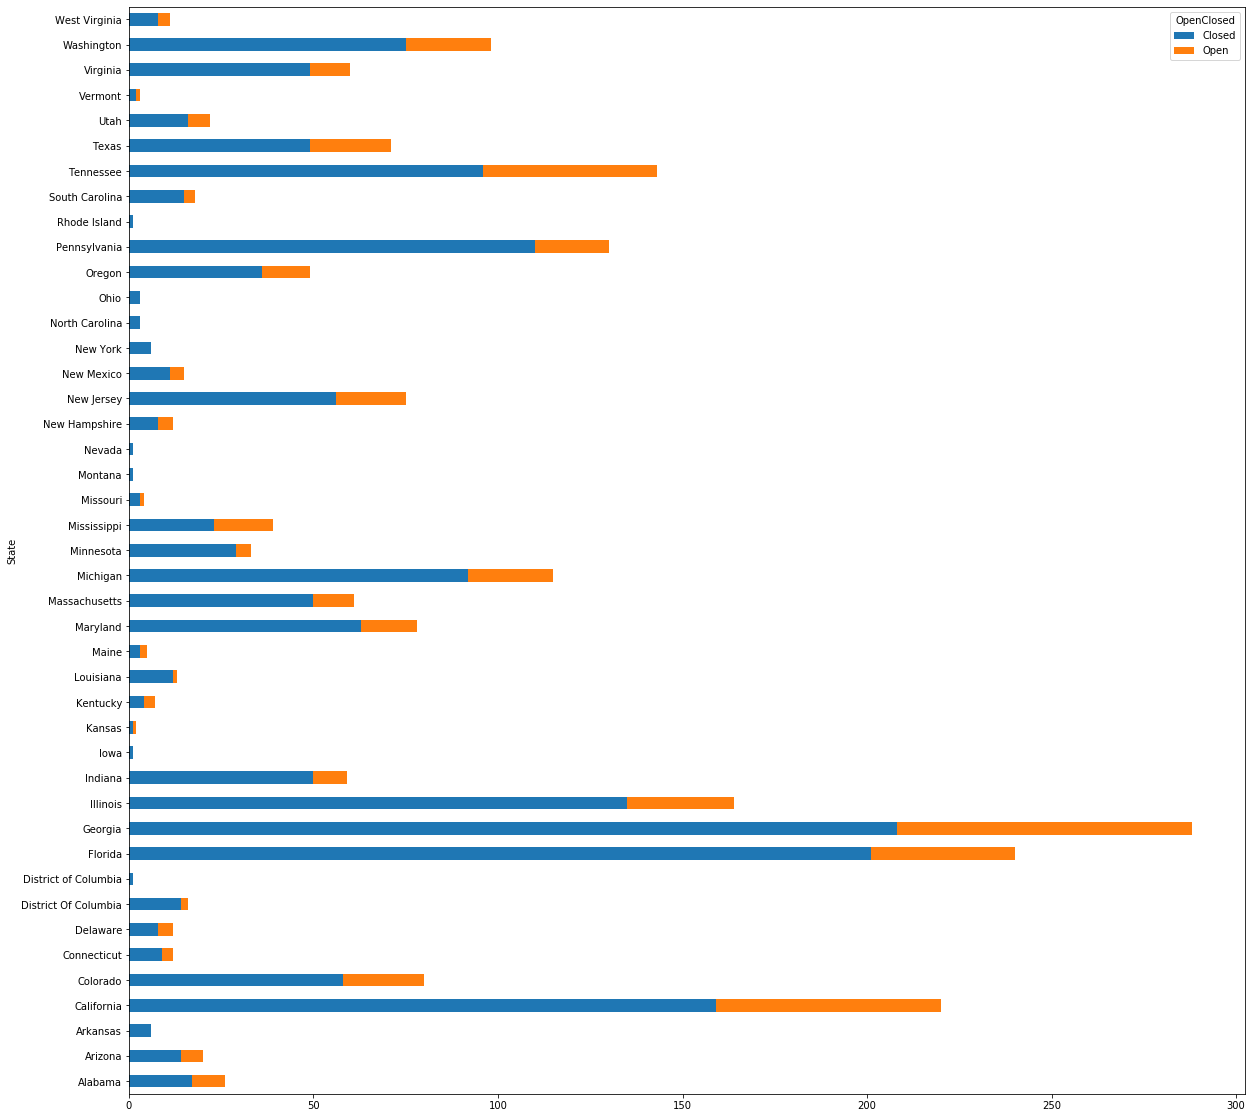

In [44]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on
#State wise status of complaints in a stacked bar chart
comcast.groupby(['State', 'OpenClosed']).size().unstack().plot(kind='barh',figsize=(20,20), stacked=True)

In [59]:
#Which state has the highest percentage of unresolved complaints
unresolved = [ Status_complaint['Open'] / (Status_complaint['Open']+Status_complaint['Closed'])]
unresolved

# kansas has the highest nymber of unresolved cases

[State
 Alabama                 0.346154
 Arizona                 0.300000
 Arkansas                     NaN
 California              0.277273
 Colorado                0.275000
 Connecticut             0.250000
 Delaware                0.333333
 District Of Columbia    0.125000
 District of Columbia         NaN
 Florida                 0.162500
 Georgia                 0.277778
 Illinois                0.176829
 Indiana                 0.152542
 Iowa                         NaN
 Kansas                  0.500000
 Kentucky                0.428571
 Louisiana               0.076923
 Maine                   0.400000
 Maryland                0.192308
 Massachusetts           0.180328
 Michigan                0.200000
 Minnesota               0.121212
 Mississippi             0.410256
 Missouri                0.250000
 Montana                      NaN
 Nevada                       NaN
 New Hampshire           0.333333
 New Jersey              0.253333
 New Mexico              0.266667
 New Yo

In [55]:
comcast['Received Via'].unique()

#notice that there are only two categories

array(['Customer Care Call', 'Internet'], dtype=object)

In [56]:
oc1 = comcast.groupby(['OpenClosed']).size()
oc1

OpenClosed
Closed    1707
Open       517
dtype: int64

In [57]:
oc2 = comcast.groupby(['OpenClosed']).size().sum()
oc2

2224

In [58]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
resolved = oc1[0]/oc2*100
resolved.round()

77.0